In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/bank-full.csv')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,Age group
0,58,management,married,tertiary,0,"$2,143.00",1,0,Null,1,-1,0,Null,0,Above 50
1,44,technician,single,secondary,0,$29.00,1,0,Null,1,-1,0,Null,0,30-50
2,33,entrepreneur,married,secondary,0,$2.00,1,1,Null,1,-1,0,Null,0,30-50
3,47,blue-collar,married,unknown,0,"$1,506.00",1,0,Null,1,-1,0,Null,0,30-50
4,33,unknown,single,unknown,0,$1.00,0,0,Null,1,-1,0,Null,0,30-50


In [6]:
# Replace string 'null' with actual NaN values
df.replace("null", pd.NA, inplace=True)

In [7]:
# Optionally: Drop rows with missing values
df.dropna(inplace=True)

In [8]:
# Convert target variable 'y' (subscription) from yes/no to 1/0
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Convert other binary yes/no columns
binary_cols = ['default', 'housing', 'loan']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# One-hot encode other categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)


In [9]:
# Separate features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print("Number of NaNs in y:", y.isna().sum())

Number of NaNs in y: 45211


In [13]:
# Drop rows where y is NaN (subscription missing)
df = df[df['y'].notna()]


In [14]:
# Fix: Remove rows where 'y' is null
df = df[df['y'].notna()]

# Convert target variable 'y' from yes/no to 1/0
df['y'] = df['y'].map({'yes': 1, 'no': 0})


In [15]:
print(df['y'].isnull().sum())  # Should be 0


0


In [16]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']


In [32]:
print("Original shape of df_encoded:", df_encoded.shape)

# Separate X and y
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Combine X and y to clean
data = pd.concat([X, y], axis=1)
print("Before dropna:", data.shape)

# Drop rows with missing values
data = data.fillna(0)
print("After fillna:", data.shape)


Original shape of df_encoded: (45211, 7198)
Before dropna: (45211, 7198)
After fillna: (45211, 7198)


In [33]:
X_clean = data.drop('y', axis=1)
y_clean = data['y']

# Now this will work correctly
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


In [34]:
# Separate X and y
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Combine to clean
data = pd.concat([X, y], axis=1)

# ✅ Replace NaNs with 0 (or choose another method)
data = data.fillna(0)

# Split cleaned X and y
X_clean = data.drop('y', axis=1)
y_clean = data['y']

# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

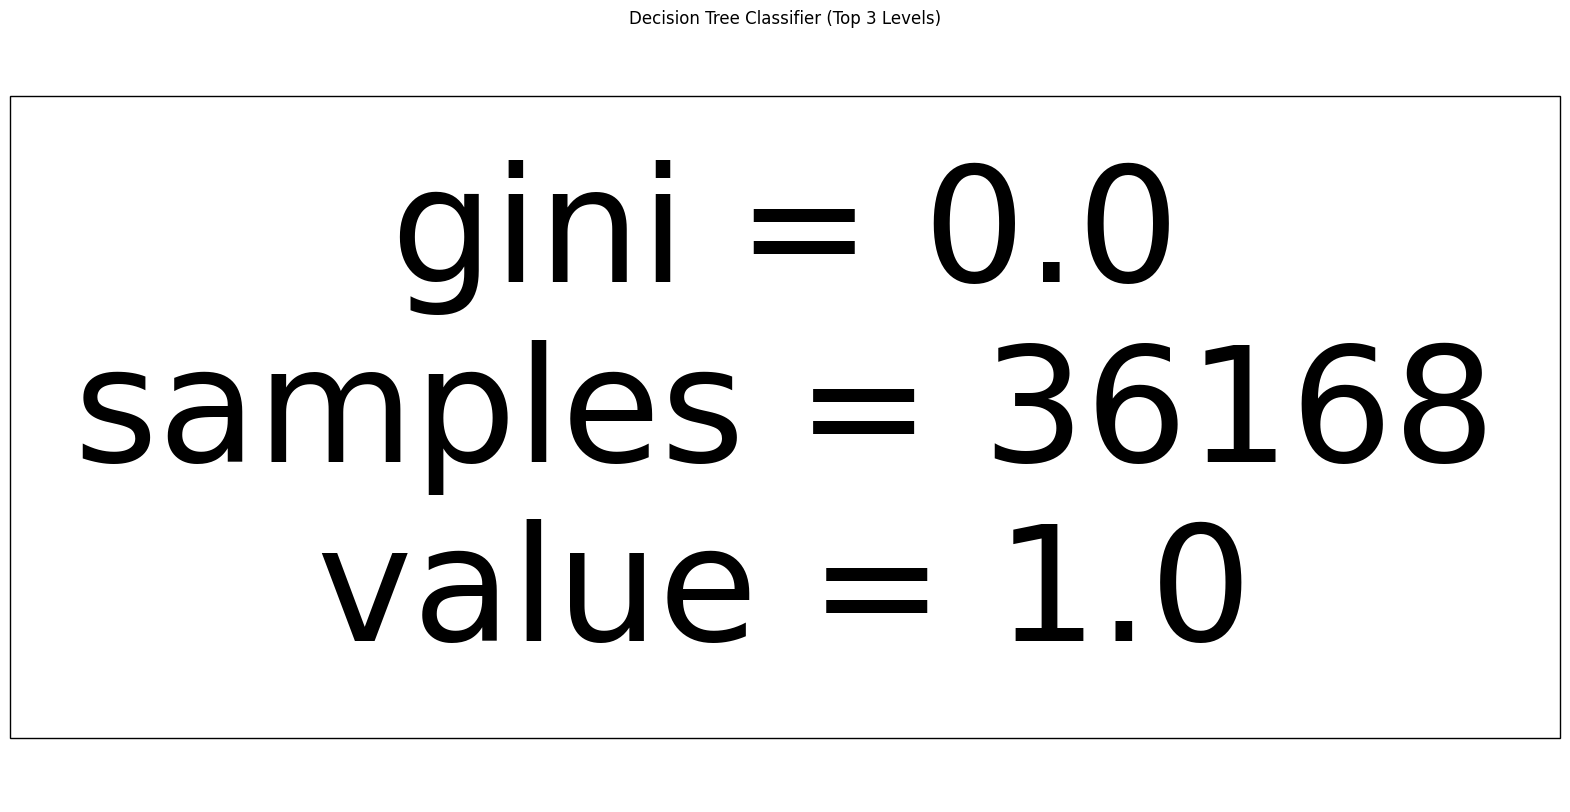

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the top levels of the decision tree
plt.figure(figsize=(20,10))
plot_tree(model,
          filled=True,
          feature_names=X_train.columns,
          class_names=["No", "Yes"],
          max_depth=3)  # Show only top 3 levels
plt.title("Decision Tree Classifier (Top 3 Levels)")
plt.show()


In [36]:
import numpy as np

# Get feature importance values
importances = model.feature_importances_
features = X_train.columns

# Sort and display top 10 important features
indices = np.argsort(importances)[::-1]

print("Top 10 Important Features:\n")
for i in range(10):
    print(f"{features[indices[i]]}: {importances[indices[i]]:.4f}")


Top 10 Important Features:

age: 0.0000
Age group_Under 30: 0.0000
Age group_Above 50: 0.0000
poutcome_success: 0.0000
poutcome_other: 0.0000
poutcome_failure: 0.0000
contact_telephone: 0.0000
contact_cellular: 0.0000
balance_-$999.00: 0.0000
balance_-$998.00: 0.0000


In [37]:
# Predict on test data
y_pred = model.predict(X_test)

# Create a DataFrame for actual vs predicted
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Save to CSV
predictions.to_csv("predictions.csv", index=False)
print("Predictions saved as 'predictions.csv'")


Predictions saved as 'predictions.csv'
